#                                                        Introduction to Computer Vision
                                                        
#                                                                 Homework
                                                        
#                                                         amine aammar - Groupe E

## 

# The goal of this homework is to train a Convolutional Neural Network to perform a classification task on the CIFAR10 data set. The classification consists of classifying objects of the CIFAR10into two categories:

• can fly (class 1) grouping objects that can fly, i.e., bird and airplane

• cannot fly (class 0) grouping objects that cannot fly, i.e. frog, deer, truck, etc..


# Install TensorFlow if it's not already installed


In [ ]:
!pip install tensorflow

# Import necessary libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Define the class labels for CIFAR-10


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to map the classes to can fly (1) and cannot fly (0)


In [ ]:
def map_labels(y):
    y = y.flatten()
    return np.where(np.isin(y, [0, 2]), 1, 0)

# Map the labels


In [ ]:
y_train = map_labels(y_train)
y_test = map_labels(y_test)

# Normalize the pixel values to be between 0 and 1


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model with a Binary classification output


In [ ]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

# Compile the model


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint


In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model


In [ ]:
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 25ms/step - accuracy: 0.8185 - loss: 0.4374 - val_accuracy: 0.8578 - val_loss: 0.3437
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8574 - loss: 0.3439 - val_accuracy: 0.8693 - val_loss: 0.3272
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8710 - loss: 0.3135 - val_accuracy: 0.8748 - val_loss: 0.3167
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.8811 - loss: 0.2913 - val_accuracy: 0.8801 - val_loss: 0.2920
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8921 - loss: 0.2654 - val_accuracy: 0.8713 - val_loss: 0.3164
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9021 - loss: 0.2443 - val_accuracy: 0.8790 - val_loss: 0.2930
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9100 - loss: 0.2238 - val_accuracy: 0.8891 - val_loss: 0.2737
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9192 -

# Evaluate the model on the test data


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 5ms/step - accuracy: 0.8891 - loss: 0.2737

Test accuracy: 0.8891000151634216


An accuracy of 88.91000151634216% is quite good, indicating that the model performs well in distinguishing between objects that can fly and those that cannot fly in the CIFAR-10 dataset.

# Predict the test set


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


# Calculate evaluation metrics


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['cannot fly', 'can fly']))

Classification Report:
               precision    recall  f1-score   support

  cannot fly       0.92      0.95      0.93      8000
     can fly       0.76      0.66      0.70      2000

    accuracy                           0.89     10000
   macro avg       0.84      0.80      0.82     10000
weighted avg       0.88      0.89      0.89     10000



The model shows high precision and recall for the "cannot fly" class, indicating reliable performance for this category. The "can fly" class has lower precision and recall, suggesting the model struggles more with this category.

# Confusion matrix


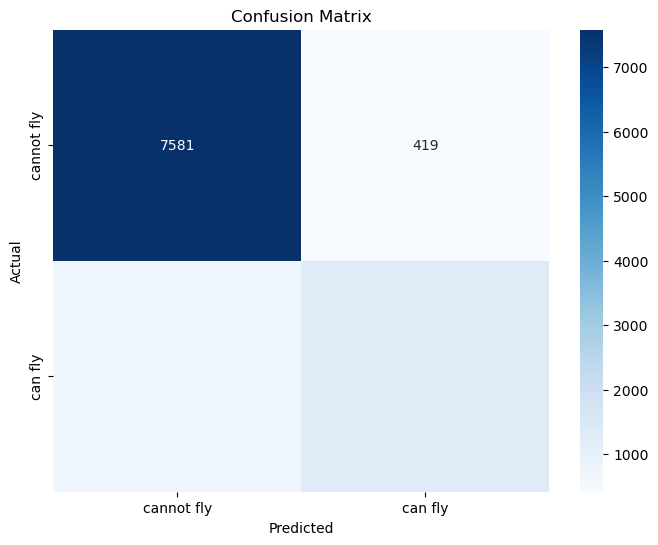

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Bleus', xticklabels=['cannot fly', 'can fly'], yticklabels=['cannot fly', 'can fly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Confusion Matrix
True Negatives (TN): 7581 instances correctly predicted as "cannot fly".
False Positives (FP): 419 instances incorrectly predicted as "can fly".
False Negatives (FN): 569 instances incorrectly predicted as "cannot fly".
True Positives (TP): 1431 instances correctly predicted as "can fly".
Conclusion: The model has a high true negative rate, indicating it is effective at identifying instances that "cannot fly". There is a moderate number of false negatives, suggesting some "can fly" instances are missed.